In [1]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

from matplotlib import animation, gridspec

ccrs = cartopy.crs
nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',linewidth=0.5, edgecolor='black', facecolor='whitesmoke')

# Meridional velocity investigation

- Plot the climatology of meridional velocities in subpolar gyre
- Plot anomaly for ispocnal range
- Plot map of depth of average of ispycnal range

## Climatology of meridional velocities

In [2]:
# vvel file names
vvel_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc'
sigma_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_composite_annual.nc'
#load data
ds_vvel = xr.open_dataset(vvel_annual)
ds_sigma = xr.open_dataset(sigma_annual)

# chnage units from cm to m
ds_vvel['VVEL'] = ds_vvel.VVEL *1e-2
ds_vvel['VVEL'].attrs['units'] = 'm/s'

In [3]:
# take 40 year average
ds_vvel_clim = ds_vvel.isel(time=slice(0, 40)).mean('time')
ds_sigma_clim = ds_sigma.isel(time=slice(0, 40)).mean('time')

In [4]:
# Define the value range
min_value = 36.25
max_value = 36.68

# Check for NaN values in SIGMA_2 and replace them if necessary
ds_sigma_clim['SIGMA_2'] = ds_sigma_clim['SIGMA_2'].fillna(0)

# Create a mask where SIGMA_2 values are within the specified range
mask = (ds_sigma_clim['SIGMA_2'] >= min_value) & (ds_sigma_clim['SIGMA_2'] <= max_value)

# Use the mask to find the indices
indices_in_range = xr.where(mask, True, False)

In [5]:
# Apply the mask to the VVEL variable
ds_range_vvel = ds_vvel_clim.where(indices_in_range).roll(nlon=+100).mean('z_t')

In [6]:
# Replace non-finite values and masked values
replacement_value = 0
ds_range_vvel['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_range_vvel['TLAT']), np.isinf(ds_range_vvel['TLAT']) | np.ma.getmask(ds_range_vvel['TLAT'])),
    replacement_value,
    ds_range_vvel['TLAT'])
ds_range_vvel['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_range_vvel['TLONG']), np.isinf(ds_range_vvel['TLONG']) | np.ma.getmask(ds_range_vvel['TLONG'])),
    replacement_value,
    ds_range_vvel['TLONG'])
plotting_data = ds_range_vvel.VVEL

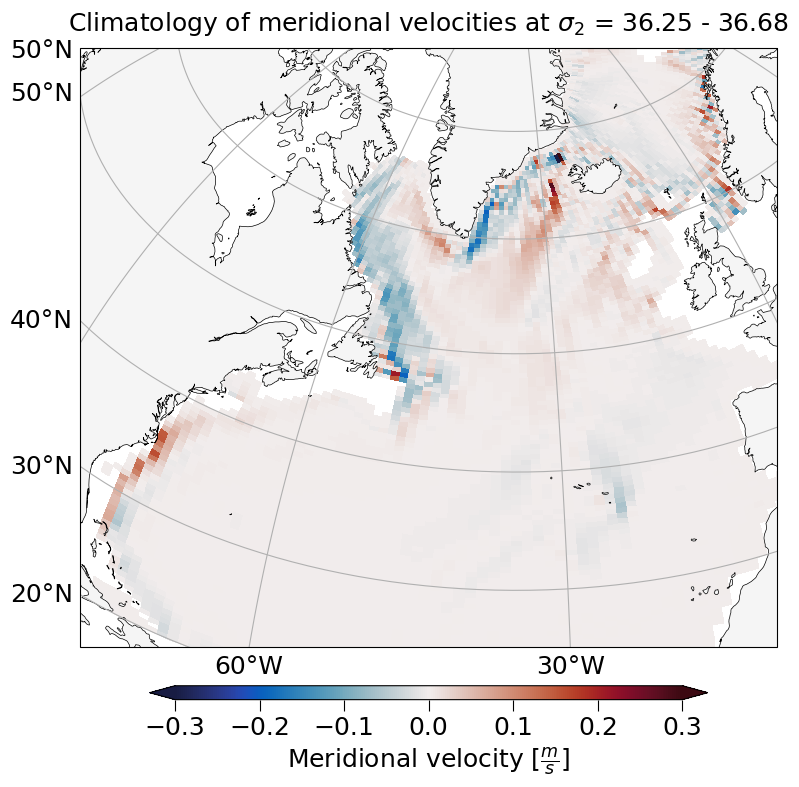

In [7]:
vmin = -0.3
vmax = -vmin
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Meridional velocity [$\frac{m}{s}$]', 'pad': 0.05}
labelsize = 18

plt.figure(figsize=(9, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80, -10, 25, 75], crs=ccrs.PlateCarree())
pc = plotting_data.plot.pcolormesh(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG',
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin=vmin, vmax=vmax,
                                    )

pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}
ax.add_feature(nature_coast)
#ax.coastlines()
plt.title(r'Climatology of meridional velocities at $\sigma_2$ = 36.25 - 36.68', fontsize=labelsize)
plt.show()

## Anomaly of isopycnal range

In [8]:
vvel_anomaly = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/vvel_anomaly.nc'
ds_vvel_anom = xr.open_dataset(vvel_anomaly)
ds_vvel_anom['VVEL'] = ds_vvel_anom.VVEL *1e-2
ds_vvel_anom['VVEL'].attrs['units'] = 'm/s'

In [9]:
# Apply the mask to the VVEL variable
ds_range_vvel = ds_vvel_anom.where(indices_in_range).roll(nlon=+100).mean('z_t')

In [10]:
# Replace non-finite values and masked values
replacement_value = 0
ds_range_vvel['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_range_vvel['TLAT']), np.isinf(ds_range_vvel['TLAT']) | np.ma.getmask(ds_range_vvel['TLAT'])),
    replacement_value,
    ds_range_vvel['TLAT'])
ds_range_vvel['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_range_vvel['TLONG']), np.isinf(ds_range_vvel['TLONG']) | np.ma.getmask(ds_range_vvel['TLONG'])),
    replacement_value,
    ds_range_vvel['TLONG'])
plotting_data = ds_range_vvel.VVEL

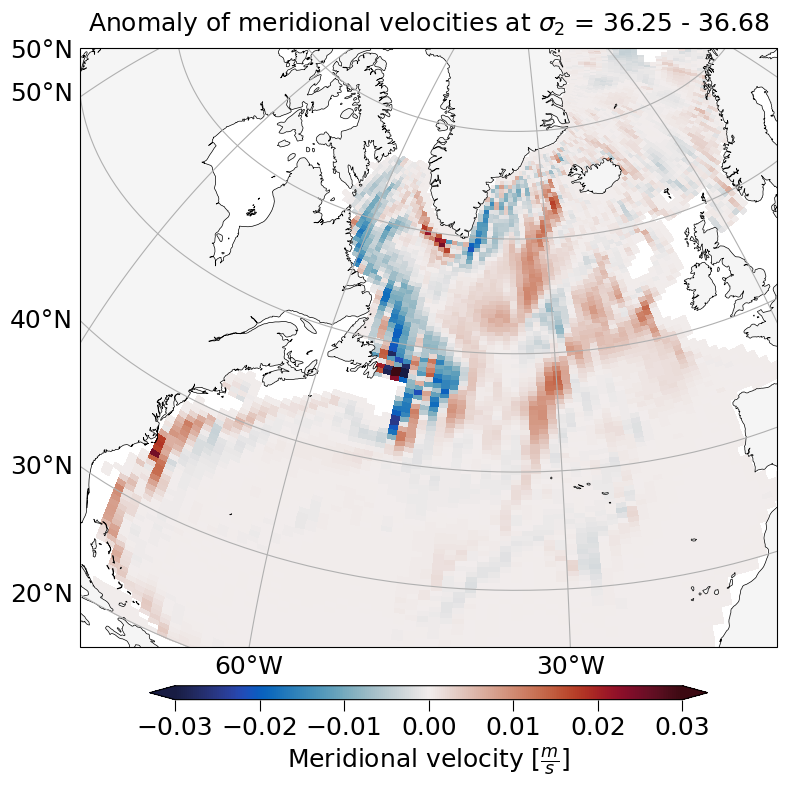

In [11]:
vmin = -0.03
vmax = -vmin
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Meridional velocity [$\frac{m}{s}$]', 'pad': 0.05}
labelsize = 18

plt.figure(figsize=(9, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80, -10, 25, 75], crs=ccrs.PlateCarree())
pc = plotting_data.plot.pcolormesh(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG',
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.balance,
                                    vmin=vmin, vmax=vmax,
                                    )

pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}
ax.add_feature(nature_coast)
#ax.coastlines()
plt.title(r'Anomaly of meridional velocities at $\sigma_2$ = 36.25 - 36.68', fontsize=labelsize)
plt.show()


## Depth of average of ispycnal range

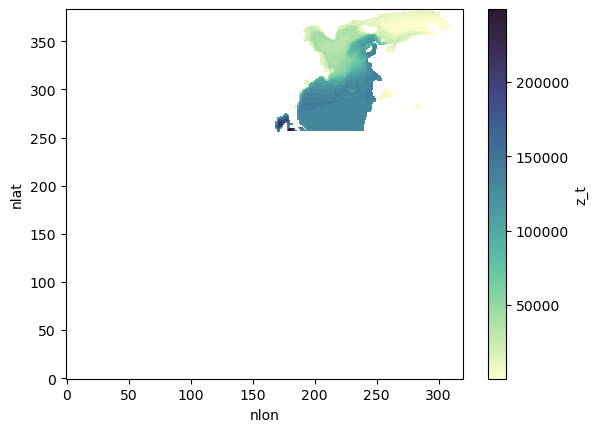

In [17]:
ds_vvel_clim.z_t.where(indices_in_range).mean('z_t').plot(cmap=cmo.deep)

In [15]:
# Replace non-finite values and masked values
replacement_value = 0
ds_vvel_clim['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_vvel_clim['TLAT']), np.isinf(ds_vvel_clim['TLAT']) | np.ma.getmask(ds_vvel_clim['TLAT'])),
    replacement_value,
    ds_vvel_clim['TLAT'])
ds_vvel_clim['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_vvel_clim['TLONG']), np.isinf(ds_vvel_clim['TLONG']) | np.ma.getmask(ds_vvel_clim['TLONG'])),
    replacement_value,
    ds_vvel_clim['TLONG'])
plotting_data = ds_vvel_clim.z_t.where(indices_in_range).mean('z_t')

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

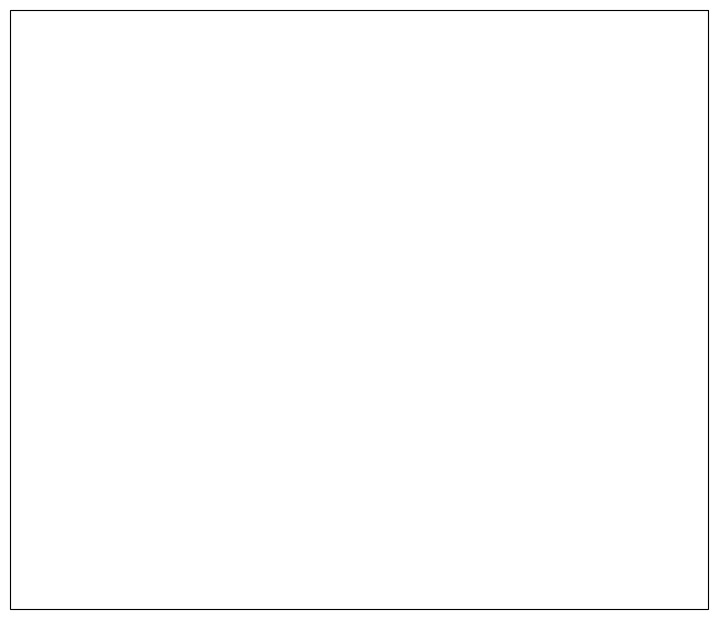

In [16]:
#vmin = -0.03
#vmax = -vmin
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Depth [$cm$]', 'pad': 0.05}
labelsize = 18

plt.figure(figsize=(9, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80, -10, 25, 75], crs=ccrs.PlateCarree())
pc = plotting_data.plot.pcolormesh(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    x='TLONG',
                                    y='TLAT',
                                    cbar_kwargs=cbar_kwargs,
                                    cmap=cmo.deep,
                                    #vmin=vmin, vmax=vmax,
                                    )

pc.colorbar.ax.xaxis.label.set_size(labelsize)
pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}
ax.add_feature(nature_coast)
#ax.coastlines()
plt.title(r'Mean depth of Isopycanl Range', fontsize=labelsize)
plt.show()